
# Tutorial: Tail Segmentation 

**The following notebook illustrate the `TailSegmentation` class.**



* Loading dependencies

In [1]:
from IPython.display import SVG, display

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from megabouts.tracking_data.tracking_data import TrackingConfig
from megabouts.tracking_data.load_example import load_example_data
from megabouts.tracking_data.tracking_data import FullTrackingData

from megabouts.preprocessing.tail_preprocessing import TailPreprocessingConfig
from megabouts.preprocessing.tail_preprocessing import TailPreprocessingResult
from megabouts.preprocessing.tail_preprocessing import TailPreprocessing

from megabouts.segmentation.segmentation_config import TailSegmentationConfig
from megabouts.segmentation.segmentation import TailSegmentation
from megabouts.segmentation.segmentation import SegmentationFactory
from megabouts.segmentation.segmentation import SegmentationResult

## Loading Data and Preprocessing

* TrackingConfig and TrackingData similar to [tutorial_Tail_Preprocessing](./tutorial_Tail_Preprocessing.ipynb)

In [2]:
df_recording, fps, mm_per_unit = load_example_data('fulltracking_posture')

tracking_cfg = TrackingConfig(fps=fps, tracking='full_tracking')

head_x = df_recording['head_x'].values*mm_per_unit
head_y = df_recording['head_y'].values*mm_per_unit
head_yaw = df_recording['head_angle'].values
tail_angle = df_recording.filter(like='tail_angle').values

tracking_data = FullTrackingData.from_posture(head_x = head_x,
                                              head_y = head_y,
                                              head_yaw = head_yaw,
                                              tail_angle = tail_angle)

tail_preprocessing_cfg = TailPreprocessingConfig(fps=tracking_cfg.fps)

tail_preprocessing_cfg = TailPreprocessingConfig(fps=tracking_cfg.fps,
                                                 num_pcs=4,
                                                 savgol_window_ms=15,
                                                 tail_speed_filter_ms = 100,
                                                 tail_speed_boxcar_filter_ms = 14
                                                 )
tail_df_input = tracking_data.tail_df
tail = TailPreprocessing(tail_preprocessing_cfg).preprocess_tail_df(tail_df_input)


In [3]:
tail.df.head(5)

angle                                                              \
   segments                                                               
          0         1         2         3         4         5         6   
0 -0.101865 -0.092813 -0.107645 -0.110575 -0.047699 -0.145887 -0.130414   
1 -0.082618 -0.087957 -0.096951 -0.092459 -0.119418 -0.043354 -0.099788   
2 -0.093377 -0.095235 -0.094292 -0.105936 -0.073785 -0.084193 -0.144378   
3 -0.092590 -0.083650 -0.100938 -0.088223 -0.097370 -0.099559 -0.101538   
4 -0.086849 -0.081982 -0.096705 -0.118475 -0.046264 -0.136459 -0.115412   

                           ... angle_smooth                                \
                           ...     segments                                 
          7         8   9  ...            2         3         4         5   
0 -0.058892 -0.128705 NaN  ...    -0.086812 -0.085880 -0.077907 -0.083591   
1 -0.101741 -0.171555 NaN  ...    -0.081511 -0.083338 -0.078373 -0.085253   
2 -0.112398 -0.042585 NaN  ...    -0.077037 -0.081058 -0.078500 -0.086296   
3 -0.091272 -0.021459 NaN  ...    -0.073390 -0.079040 -0.078286 -0.086720   
4 -0.085300 -0.015487 NaN  ...    -0.070570 -0.077285 -0.077732 -0.086525   

                                          vigor no_tracking  
                                                             
          6         7         8         9                    
0 -0.072974 -0.078165 -0.129616  0.000359   NaN        True  
1 -0.074040 -0.073428 -0.106065  0.000494   NaN        True  
2 -0.074570 -0.069208 -0.086540  0.000602   NaN        True  
3 -0.074562 -0.065506 -0.071041  0.000682   NaN        True  
4 -0.074018 -0.062321 -0.059569  0.000734   NaN        True  

[5 rows x 32 columns]

# Segmentation using tail vigor

In [4]:
tail_vigor = tail.vigor
tail_segmentation_cfg = TailSegmentationConfig(fps = tracking_cfg.fps,
                                               threshold_params = {'method':'GMM','thresh_std':2.1})
segmentation_function = SegmentationFactory.get_segmenter(tail_segmentation_cfg)
segments = segmentation_function.segment_from_tail(tail_vigor)

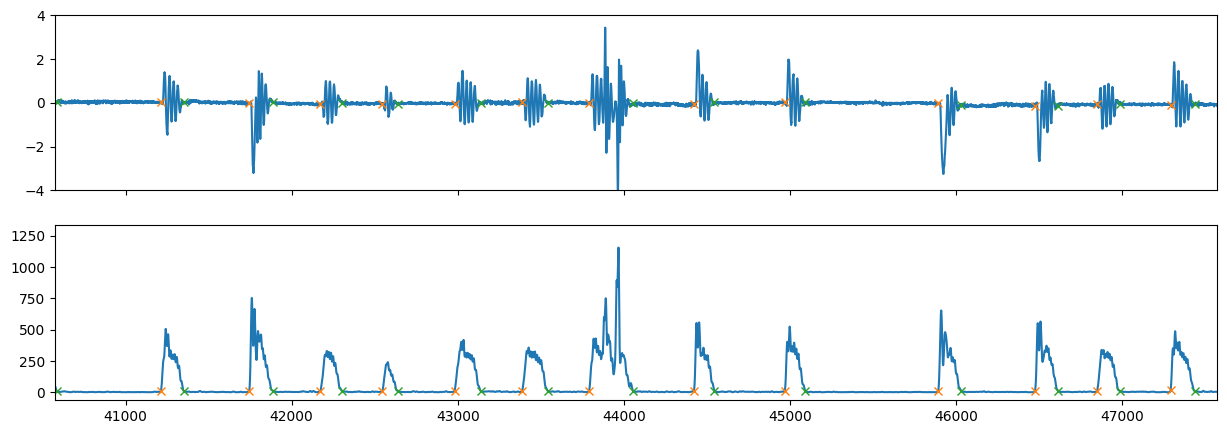

In [5]:
fig,ax = plt.subplots(2,1,figsize=(15,5),sharex=True)

x = tracking_data._tail_angle[:,7]
ax[0].plot(x)
ax[0].plot(segments.onset, x[segments.onset], "x")
ax[0].plot(segments.offset, x[segments.offset], "x")
ax[0].set_ylim(-4,4)

x = tail_vigor
ax[1].plot(x)
ax[1].plot(segments.onset, x[segments.onset], "x")
ax[1].plot(segments.offset, x[segments.offset], "x")

t = np.arange(tracking_data.T)/tracking_cfg.fps
IdSt = np.random.randint(tracking_data.T)
Duration = 10*tracking_cfg.fps
ax[1].set_xlim(IdSt,IdSt+Duration)

plt.show()

In [6]:
np.linspace(0.5,10,100)

array([ 0.5       ,  0.5959596 ,  0.69191919,  0.78787879,  0.88383838,
        0.97979798,  1.07575758,  1.17171717,  1.26767677,  1.36363636,
        1.45959596,  1.55555556,  1.65151515,  1.74747475,  1.84343434,
        1.93939394,  2.03535354,  2.13131313,  2.22727273,  2.32323232,
        2.41919192,  2.51515152,  2.61111111,  2.70707071,  2.8030303 ,
        2.8989899 ,  2.99494949,  3.09090909,  3.18686869,  3.28282828,
        3.37878788,  3.47474747,  3.57070707,  3.66666667,  3.76262626,
        3.85858586,  3.95454545,  4.05050505,  4.14646465,  4.24242424,
        4.33838384,  4.43434343,  4.53030303,  4.62626263,  4.72222222,
        4.81818182,  4.91414141,  5.01010101,  5.10606061,  5.2020202 ,
        5.2979798 ,  5.39393939,  5.48989899,  5.58585859,  5.68181818,
        5.77777778,  5.87373737,  5.96969697,  6.06565657,  6.16161616,
        6.25757576,  6.35353535,  6.44949495,  6.54545455,  6.64141414,
        6.73737374,  6.83333333,  6.92929293,  7.02525253,  7.12

In [7]:
# Number of bouts as function of threshold:
thresh_list = np.linspace(1,8,20)
num_peaks = np.zeros_like(thresh_list)
tail_vigor = tail.vigor

for i,thresh in enumerate(thresh_list):
    print(thresh)
    tail_segmentation_cfg = TailSegmentationConfig(fps = tracking_cfg.fps,
                                                threshold_params = {'method':'GMM','thresh_std':thresh})
    segmentation_function = SegmentationFactory.get_segmenter(tail_segmentation_cfg)
    segments = segmentation_function.segment_from_tail(tail_vigor)

    num_peaks[i] = len(segments.onset)


1.0
1.1578947368421053
1.3157894736842106
1.4736842105263157
1.631578947368421
1.7894736842105263
1.9473684210526314
2.1052631578947367
2.263157894736842
2.4210526315789473
2.5789473684210527
2.7368421052631575
2.894736842105263
3.052631578947368
3.2105263157894735
3.3684210526315788
3.526315789473684
3.6842105263157894
3.8421052631578947
4.0


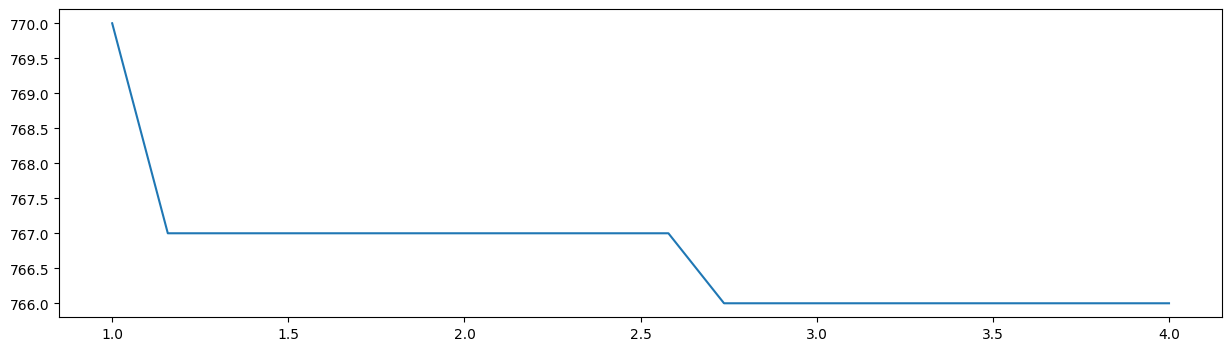

In [8]:
plt.figure(figsize=(15,4))
plt.plot(thresh_list,num_peaks)
plt.show()